In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys, os.path, os
import pandas as pd
import numpy as np

os.chdir("drive/Shareddrives/FAIRNESS/Colab/Notebooks_for_topic/EXP0/DATOS/RESULTADOS")


from scipy import stats
import pandas as pd
import numpy as np
from tqdm import tqdm
import scipy.stats

Mounted at /content/drive


In [ ]:
data_results=pd.read_excel('fairnes_measures.xlsx')
data_results.head()

,Model,Data_id,Dia,tipo_fairness,Valor,EMD
0,SEPP,0,2030-01-01,variance,9.908611e-07,0.034290
1,SEPP,0,2030-01-01,MaxMin,1.407737e-03,0.034290
2,SEPP,0,2030-01-01,gini,9.576905e-03,0.034290
3,SEPP,0,2030-01-02,variance,1.570582e-04,0.026907
4,SEPP,0,2030-01-02,MaxMin,1.772333e-02,0.026907


In [ ]:
import seaborn as sns

<Axes: xlabel='Model', ylabel='Valor'>

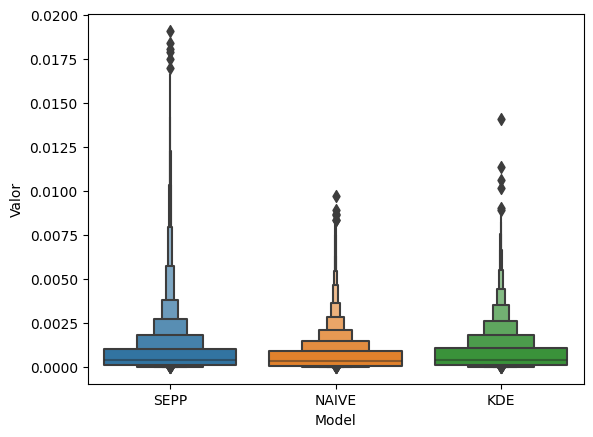

In [ ]:
sns.boxenplot(data=data_results[data_results["tipo_fairness"]=="variance"],x="Model",y="Valor")

<Axes: xlabel='Model', ylabel='Valor'>

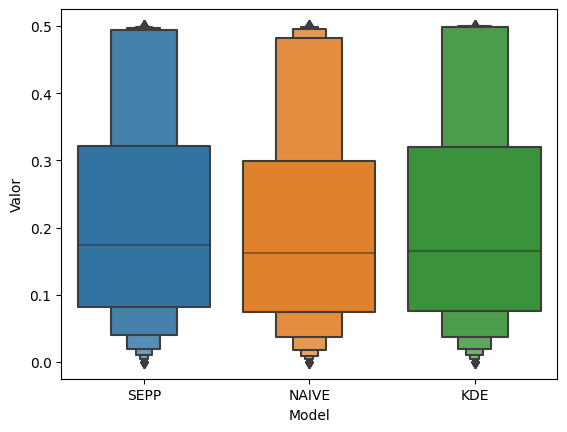

In [ ]:
sns.boxenplot(data=data_results[data_results["tipo_fairness"]=="gini"],x="Model",y="Valor")

In [ ]:
data_results[(data_results["tipo_fairness"]=="variance") & (data_results["Model"]=="SEPP")]["Valor"]

0        9.908611e-07
3        1.570582e-04
6        2.071967e-07
9        1.342945e-04
12       1.620664e-04
             ...     
96081    2.506053e-04
96084    6.070516e-04
96087    2.141071e-04
96090    3.967216e-04
96093    1.270267e-03
Name: Valor, Length: 10920, dtype: float64

(array([8.504e+03, 1.624e+03, 4.800e+02, 1.690e+02, 7.400e+01, 4.000e+01,
        1.200e+01, 8.000e+00, 7.000e+00, 2.000e+00]),
 array([9.68231153e-12, 9.68930523e-04, 1.93786104e-03, 2.90679155e-03,
        3.87572206e-03, 4.84465258e-03, 5.81358309e-03, 6.78251360e-03,
        7.75144411e-03, 8.72037463e-03, 9.68930514e-03]),
 <BarContainer object of 10 artists>)

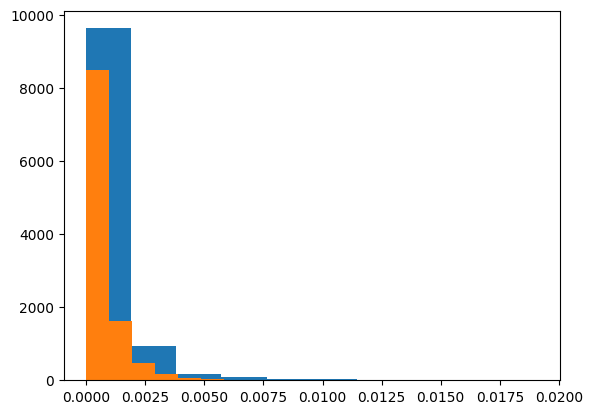

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
stats.ttest_ind(data_results[(data_results["tipo_fairness"]=="gini") & (data_results["Model"]=="SEPP")]["Valor"],
                data_results[(data_results["tipo_fairness"]=="gini") & (data_results["Model"]=="NAIVE")]["Valor"])
plt.hist(data_results[(data_results["tipo_fairness"]=="variance") & (data_results["Model"]=="SEPP")]["Valor"])

plt.hist(data_results[(data_results["tipo_fairness"]=="variance") & (data_results["Model"]=="NAIVE")]["Valor"])

In [ ]:
statistic(x,y,0)

5.313905473717845e-05

In [ ]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

x=data_results[(data_results["tipo_fairness"]=="variance") & (data_results["Model"]=="SEPP")]["Valor"]
y=data_results[(data_results["tipo_fairness"]=="variance") & (data_results["Model"]=="KDE")]["Valor"]

from scipy.stats import permutation_test
res = permutation_test((x,y), statistic, vectorized=True, alternative='less')



In [ ]:
res.pvalue

1.0

In [ ]:
!pip install permute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.3/154.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from permute.core import two_sample

# # Datos de ejemplo para dos grupos (grupo1 y grupo2)
# grupo1 = x
# grupo2 = y

# Realizar la prueba de permutación
resultado = two_sample(grupo1, grupo2, reps=1000, alternative='two-sided')

# Imprimir el resultado
print("Estadístico de prueba:", resultado[0])
print("Valor p:", resultado[1])

Estadístico de prueba: 0.005994005994005994
Valor p: 5.313905473717845e-05


In [ ]:
grupo1 = data_results[(data_results["tipo_fairness"]=="variance") & (data_results["Model"]=="SEPP")]["Valor"]
grupo2 = data_results[(data_results["tipo_fairness"]=="variance") & (data_results["Model"]=="KDE")]["Valor"]
grupo3=data_results[(data_results["tipo_fairness"]=="variance") & (data_results["Model"]=="NAIVE")]["Valor"]

In [ ]:
import scipy.stats as stats
stats.friedmanchisquare(grupo1, grupo2, grupo3)

FriedmanchisquareResult(statistic=304.3743589743681, pvalue=8.052815190631534e-67)

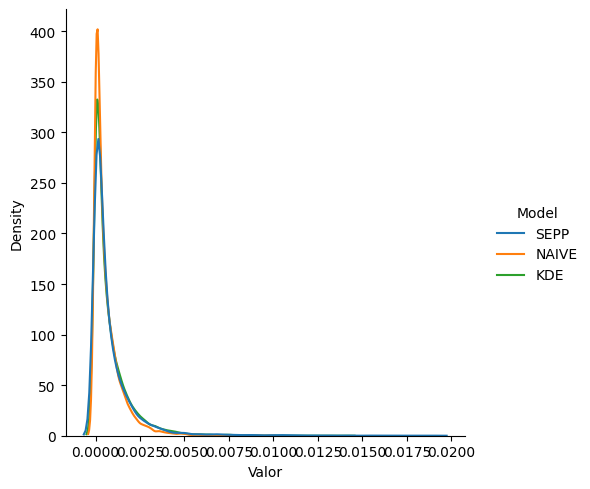

In [ ]:
sns.displot(data_results[data_results["tipo_fairness"]=="variance"],kind="kde",x="Valor",hue="Model")

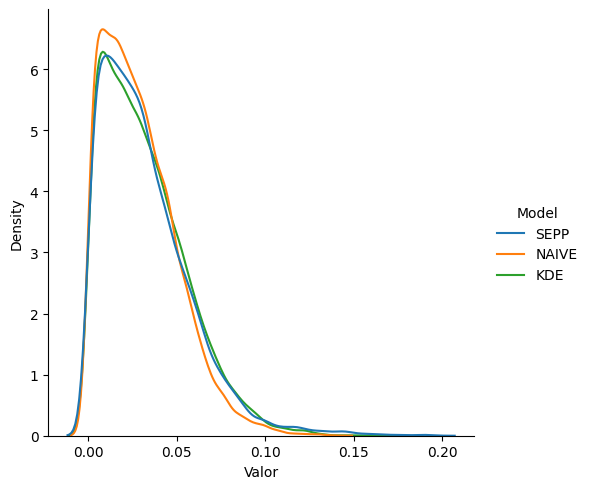

In [ ]:
sns.displot(data_results[data_results["tipo_fairness"]=="MaxMin"],kind="kde",x="Valor",hue="Model")

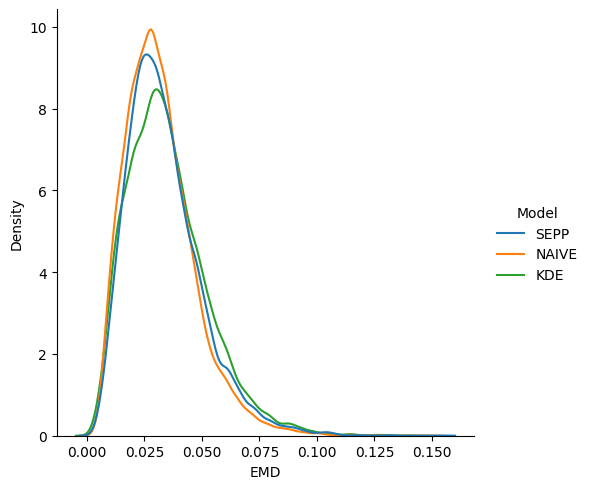

In [ ]:
sns.displot(data_results,kind="kde",x="EMD",hue="Model")

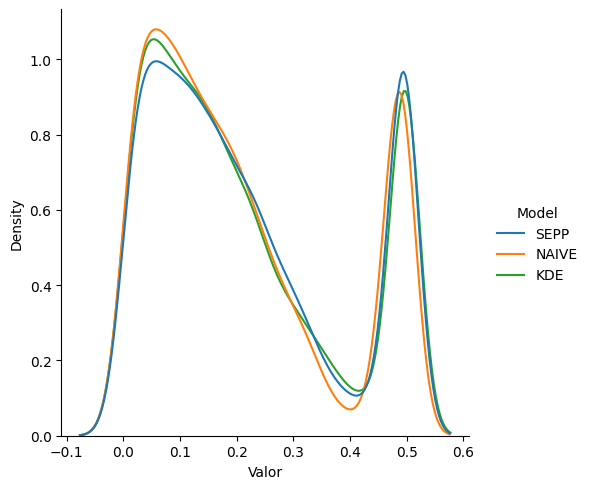

In [ ]:
sns.displot(data_results[data_results["tipo_fairness"]=="gini"],kind="kde",x="Valor",hue="Model")

In [ ]:
filter_Data=data_results[(data_results["tipo_fairness"]=="gini")&(data_results["Valor"]>=0.4)].sort_values(by=['Valor','Dia'],ascending=[False,True])
filter_Data.query(f"Model=='SEPP'").head()

,Model,Data_id,Dia,tipo_fairness,Valor,EMD
66590,SEPP,20,2030-12-23,gini,0.499795,0.024513
66053,SEPP,20,2030-06-27,gini,0.499767,NaN
66593,SEPP,20,2030-12-24,gini,0.499753,0.034685
66422,SEPP,20,2030-10-28,gini,0.499750,0.031440
65537,SEPP,20,2030-01-06,gini,0.499694,0.033252


In [ ]:
filter_Data.query(f"Model=='KDE'").head()

,Model,Data_id,Dia,tipo_fairness,Valor,EMD
21965,KDE,6,2030-02-11,gini,0.5,0.025077
22070,KDE,6,2030-03-18,gini,0.5,0.028329
22805,KDE,6,2030-11-18,gini,0.5,0.010187
21923,KDE,6,2030-01-28,gini,0.5,0.021738
22589,KDE,6,2030-09-07,gini,0.5,0.035385


In [ ]:
filter_Data.query(f"Model=='NAIVE'").head()

,Model,Data_id,Dia,tipo_fairness,Valor,EMD
21383,NAIVE,6,2030-07-31,gini,0.499982,0.023256
21089,NAIVE,6,2030-04-24,gini,0.499982,0.043986
20879,NAIVE,6,2030-02-13,gini,0.499976,0.032432
21824,NAIVE,6,2030-12-25,gini,0.499976,0.034645
21614,NAIVE,6,2030-10-16,gini,0.499975,0.038757


In [12]:
import matplotlib.pyplot as plt
def plot_intensity(intensity,name):
    fig, ax = plt.subplots(figsize=(5,2))
    im=ax.imshow(intensity, 'jet', interpolation='none', alpha=0.7,vmin=0)
    ax.invert_yaxis()
    plt.colorbar(im)
    plt.savefig(name)
    plt.show(ax)

In [3]:
import pickle as pkl
import datetime
day=datetime.datetime(2030, 7, 31, 0, 0)
day=datetime.datetime(2030, 6, 7, 0, 0)
data=15


predicciones=pkl.load(open(f"../MODELOS/SEPP/Data_{str(data)}/predictions.pkl", "rb"))
realidad=pkl.load(open(f"../MODELOS/SEPP/Data_{str(data)}/reals.pkl", "rb"))

In [4]:
predict=predicciones[day]
real=realidad[day]

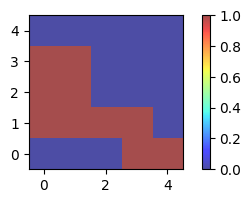

In [13]:
mask=np.array([[False,False,False,True,True],
               [True,True,True,True,False],
               [True,True,False,False,False],
               [True,True,False,False,False],
               [False,False,False,False,False],
               ])
plot_intensity(mask,"example_mask.pdf")

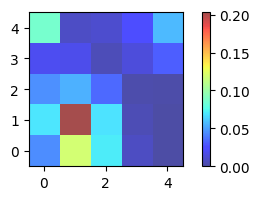

In [14]:
plot_intensity(predict,"example_prediction.pdf")

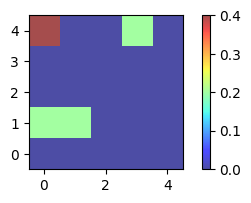

In [15]:
plot_intensity(real,"example_reality.pdf")

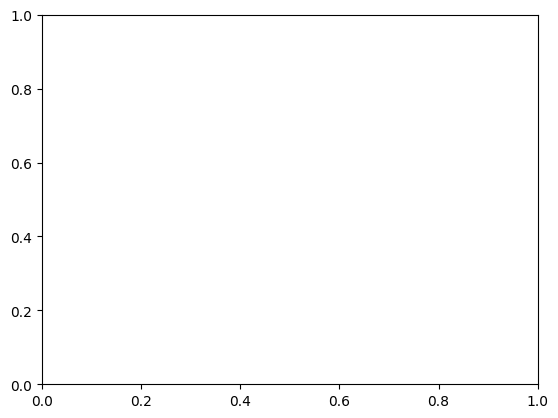

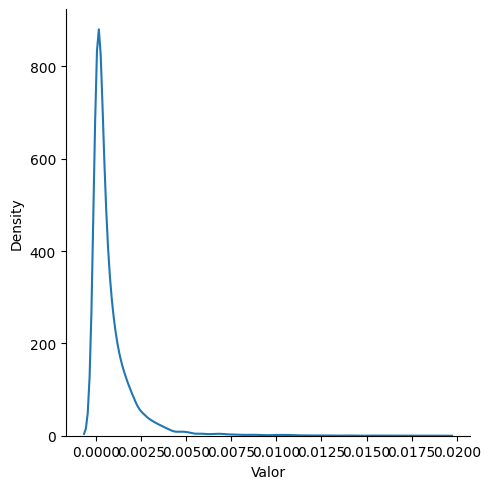

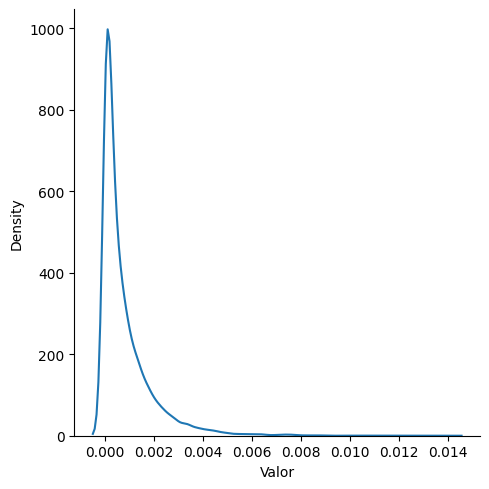

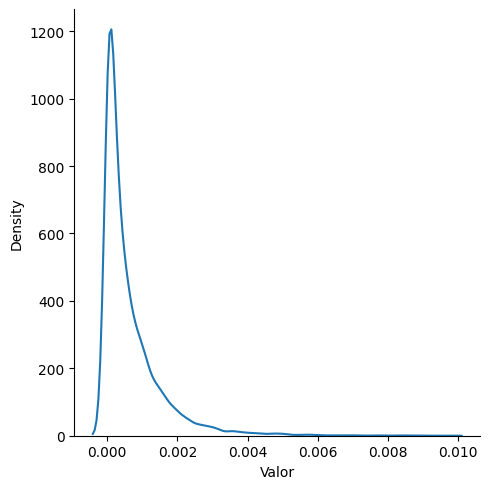

In [ ]:
# fig, ax = plt.subplots()

import matplotlib.pyplot as plt

plt.xlim(0, 1)

sns.displot(grupo1,kind="kde")
sns.displot(grupo2,kind="kde")
sns.displot(grupo3,kind="kde")

# plt.show()

In [ ]:
data_results.tipo_fairness.unique(), data_results.Model.unique()

(array(['variance', 'MaxMin', 'gini'], dtype=object),
 array(['SEPP', 'NAIVE', 'KDE'], dtype=object))

## 1. Welch Test para Métricas de Fairness

In [ ]:
control=[]
treatment=[]
g_libertad=[]
n_value=[]
T_value=[]
p_value_UpperTail=[]
p_value_LowerTail=[]
p_value_TwoTail=[]
fairness_metric=[]


for f in ['variance', 'MaxMin', 'gini']:
  data_filter=data_results.query(f"(tipo_fairness=='{f}')").reset_index()


  #Calculando welch test
  for treat in ['SEPP', 'NAIVE', 'KDE']:
    data_treat=data_filter.query(f"(Model=='{treat}')").reset_index()
    for con in ['SEPP', 'NAIVE', 'KDE']:
      if treat==con:
        continue
      control.append(con)
      treatment.append(treat)
      data_control=data_filter.query(f"(Model=='{con}')").reset_index()
      fairness_metric.append(f)

      n_cg=len(data_control)
      n_treat=len(data_treat)

      avg_cg=np.mean(data_control.Valor)
      avg_treat=np.mean(data_treat.Valor)

      std_cg=np.std(data_control.Valor)
      std_treat=np.std(data_treat.Valor)

      t_value=(avg_cg-avg_treat)/np.sqrt(( pow(std_cg,2)/n_cg)+( pow(std_treat,2)/n_treat))
      g_value=pow( ( pow(std_cg,2)/n_cg)+( pow(std_treat,2)/n_treat) ,2 ) / ( ( pow( pow(std_cg,2)/n_cg,2)/(n_cg-1) ) + ( pow(pow(std_treat,2)/n_treat,2)/(n_treat-1) ) )

      n_value.append(n_cg)
      g_libertad.append(g_value)
      T_value.append(t_value)

      p_value_UpperTail.append(  1-scipy.stats.t.sf(abs( t_value ), df=g_value)  )
      p_value_LowerTail.append(  scipy.stats.t.sf(abs( t_value ), df=g_value)  )
      p_value_TwoTail.append(  scipy.stats.t.sf(abs( t_value ), df=g_value)*2  )



welch_test_result=pd.DataFrame({'Model 1':control,
                                        'Model 2':treatment,
                                        'Metrica':fairness_metric,
                                        'Tamaño':n_value,
                                        'Graos Libertad':g_libertad,
                                        'T valor':T_value,
                                        'Upper Tail':p_value_UpperTail,
                                        'Lower Tail':p_value_LowerTail,
                                        'Two Tail':p_value_TwoTail})

welch_test_result.to_excel('welch_test_result_Fairness.xlsx')

In [ ]:
welch_test_result

,Model 1,Model 2,Metrica,Tamaño,Graos Libertad,T valor,Upper Tail,Lower Tail,Two Tail
0,NAIVE,SEPP,variance,10920,18311.123873,-12.531856,1.000000,3.507655e-36,7.015310e-36
1,KDE,SEPP,variance,10920,20485.326801,-3.117701,0.999087,9.126004e-04,1.825201e-03
2,SEPP,NAIVE,variance,10920,18311.123873,12.531856,1.000000,3.507655e-36,7.015310e-36
3,KDE,NAIVE,variance,10920,20957.038474,10.945921,1.000000,4.133566e-28,8.267133e-28
4,SEPP,KDE,variance,10920,20485.326801,3.117701,0.999087,9.126004e-04,1.825201e-03
5,NAIVE,KDE,variance,10920,20957.038474,-10.945921,1.000000,4.133566e-28,8.267133e-28
6,NAIVE,SEPP,MaxMin,10920,21123.860819,-10.320886,1.000000,3.248965e-25,6.497930e-25
7,KDE,SEPP,MaxMin,10920,21717.700847,-0.807098,0.790191,2.098094e-01,4.196187e-01
8,SEPP,NAIVE,MaxMin,10920,21123.860819,10.320886,1.000000,3.248965e-25,6.497930e-25
9,KDE,NAIVE,MaxMin,10920,21572.398458,9.887784,1.000000,2.632124e-23,5.264248e-23


## 2. Welch Test para EMD

In [ ]:
control=[]
treatment=[]
g_libertad=[]
n_value=[]
T_value=[]
p_value_UpperTail=[]
p_value_LowerTail=[]
p_value_TwoTail=[]
fairness_metric=[]


for f in ['variance']:
  data_filter=data_results.query(f"(tipo_fairness=='{f}')").reset_index()

  #Calculando welch test
  for treat in ['SEPP', 'NAIVE', 'KDE']:
    data_treat=data_filter.query(f"(Model=='{treat}')").reset_index()
    for con in ['SEPP', 'NAIVE', 'KDE']:
      if treat==con:
        continue
      control.append(con)
      treatment.append(treat)
      data_control=data_filter.query(f"(Model=='{con}')").reset_index()
      fairness_metric.append(f)

      n_cg=len(data_control)
      n_treat=len(data_treat)

      avg_cg=np.mean(data_control.EMD)
      avg_treat=np.mean(data_treat.EMD)

      std_cg=np.std(data_control.EMD)
      std_treat=np.std(data_treat.EMD)

      t_value=(avg_cg-avg_treat)/np.sqrt(( pow(std_cg,2)/n_cg)+( pow(std_treat,2)/n_treat))
      g_value=pow( ( pow(std_cg,2)/n_cg)+( pow(std_treat,2)/n_treat) ,2 ) / ( ( pow( pow(std_cg,2)/n_cg,2)/(n_cg-1) ) + ( pow(pow(std_treat,2)/n_treat,2)/(n_treat-1) ) )

      n_value.append(n_cg)
      g_libertad.append(g_value)
      T_value.append(t_value)

      p_value_UpperTail.append(  1-scipy.stats.t.sf(abs( t_value ), df=g_value)  )
      p_value_LowerTail.append(  scipy.stats.t.sf(abs( t_value ), df=g_value)  )
      p_value_TwoTail.append(  scipy.stats.t.sf(abs( t_value ), df=g_value)*2  )



welch_test_result=pd.DataFrame({'Model 1':control,
                                        'Model 2':treatment,
                                        'Metrica':fairness_metric,
                                        'Tamaño':n_value,
                                        'Graos Libertad':g_libertad,
                                        'T valor':T_value,
                                        'Upper Tail':p_value_UpperTail,
                                        'Lower Tail':p_value_LowerTail,
                                        'Two Tail':p_value_TwoTail})

welch_test_result.to_excel('welch_test_result_EMD.xlsx')

In [ ]:
welch_test_result

,Model 1,Model 2,Metrica,Tamaño,Graos Libertad,T valor,Upper Tail,Lower Tail,Two Tail
0,NAIVE,SEPP,variance,10920,21750.132858,-8.869875,1.0,3.937765e-19,7.875531e-19
1,KDE,SEPP,variance,10920,21741.009692,5.339953,1.0,4.695208e-08,9.390416e-08
2,SEPP,NAIVE,variance,10920,21750.132858,8.869875,1.0,3.937765e-19,7.875531e-19
3,KDE,NAIVE,variance,10920,21476.164785,14.045797,1.0,6.441299e-45,1.288260e-44
4,SEPP,KDE,variance,10920,21741.009692,-5.339953,1.0,4.695208e-08,9.390416e-08
5,NAIVE,KDE,variance,10920,21476.164785,-14.045797,1.0,6.441299e-45,1.288260e-44


In [ ]:
2.036730e-02

0.0203673

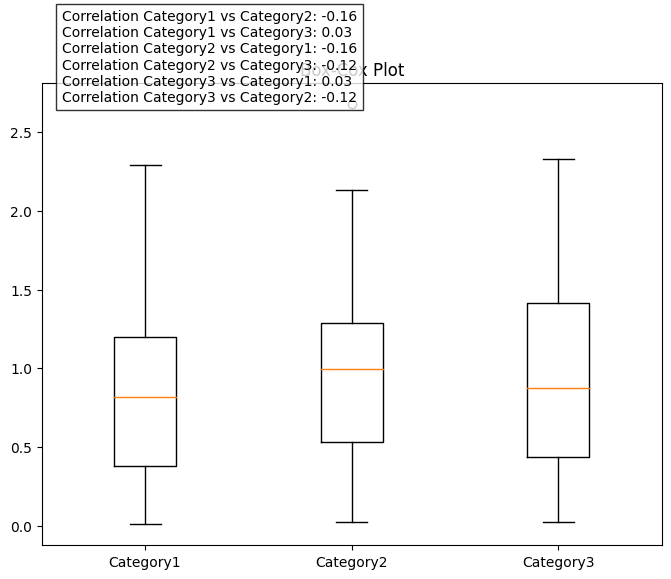

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Genera datos de ejemplo para tres categorías (asegurándote de que sean positivos)
np.random.seed(0)
data = {
    'Category1': np.random.exponential(scale=2, size=100),
    'Category2': np.random.exponential(scale=2, size=100),
    'Category3': np.random.exponential(scale=2, size=100)
}

# Crea un DataFrame de Pandas
df = pd.DataFrame(data)

# Calcula las correlaciones entre las variables
correlation_matrix = df.corr()

# Aplica la transformación logarítmica a los datos
for col in df.columns:
    df[col] = np.log(df[col] + 1)  # Se suma 1 para evitar valores negativos

# Plotea el gráfico de Box-Cox
plt.figure(figsize=(8, 6))

# Plotea el Box-Cox Plot
plt.boxplot([df['Category1'], df['Category2'], df['Category3']], labels=['Category1', 'Category2', 'Category3'])
plt.title('Box-Cox Plot')

# Agrega una caja de texto con las correlaciones
textstr = '\n'.join([f'Correlation {col1} vs {col2}: {correlation_matrix.loc[col1, col2]:.2f}'
                     for col1 in df.columns for col2 in df.columns if col1 != col2])
plt.gcf().text(0.15, 0.85, textstr, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))


plt.show()
